In [1]:
#Load packages
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import plotly.express as px

## Part 1: Rule-based Sentiment analysis using VADER

In [2]:
#Load previously created data of oba, wsj and nyt - see nrcEmotionAnalysis.ipynb
data = pd.read_csv('nonEmotiondata.csv')
data.head(3)

,Unnamed: 0,file,text_oba,text_wsj,text_nyt,date
0,0,2004-07-28-DNCSpeech.txt,"On behalf of the great state of Illinois, cros...",John Kerry's decorated service in Vietnam took...,Barack Obama took the dais as the keynote spea...,2004-07-28
1,1,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,2008-06-04
2,2,2008-11-05-ObamaElected.txt,"Hello, Chicago.\n\nIf there is anyone out ther...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,2008-11-05


In [3]:
data['oba_scores']=0
data['wsj_scores']=0
data['nyt_scores']=0
for i in range(0,len(data)):
    data['oba_scores'][i]=analyzer.polarity_scores(data.iloc[i,2])
    data['wsj_scores'][i]=analyzer.polarity_scores(data.iloc[i,3])
    data['nyt_scores'][i]=analyzer.polarity_scores(data.iloc[i,4])
#Calculating scores with vader and adding them to the df


C:\Users\Kylan\AppData\Local\Temp\ipykernel_14396\682066490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['oba_scores'][i]=analyzer.polarity_scores(data.iloc[i,2])
C:\Users\Kylan\AppData\Local\Temp\ipykernel_14396\682066490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wsj_scores'][i]=analyzer.polarity_scores(data.iloc[i,3])
C:\Users\Kylan\AppData\Local\Temp\ipykernel_14396\682066490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [4]:
data.head()
#Checking that the scores have been implemented properly

,Unnamed: 0,file,text_oba,text_wsj,text_nyt,date,oba_scores,wsj_scores,nyt_scores
0,0,2004-07-28-DNCSpeech.txt,"On behalf of the great state of Illinois, cros...",John Kerry's decorated service in Vietnam took...,Barack Obama took the dais as the keynote spea...,2004-07-28,"{'neg': 0.07, 'neu': 0.749, 'pos': 0.181, 'com...","{'neg': 0.111, 'neu': 0.787, 'pos': 0.102, 'co...","{'neg': 0.038, 'neu': 0.815, 'pos': 0.147, 'co..."
1,1,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,2008-06-04,"{'neg': 0.063, 'neu': 0.76, 'pos': 0.177, 'com...","{'neg': 0.041, 'neu': 0.812, 'pos': 0.147, 'co...","{'neg': 0.05, 'neu': 0.816, 'pos': 0.133, 'com..."
2,2,2008-11-05-ObamaElected.txt,"Hello, Chicago.\n\nIf there is anyone out ther...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,2008-11-05,"{'neg': 0.066, 'neu': 0.758, 'pos': 0.176, 'co...","{'neg': 0.075, 'neu': 0.812, 'pos': 0.113, 'co...","{'neg': 0.066, 'neu': 0.82, 'pos': 0.114, 'com..."
3,3,2009-01-05-EconomyPlans.txt,"All right. Well, thanks for taking the time to...",President-elect Barack Obama and congressional...,President-elect Barack Obama plans to include ...,2009-01-05,"{'neg': 0.072, 'neu': 0.856, 'pos': 0.072, 'co...","{'neg': 0.059, 'neu': 0.816, 'pos': 0.124, 'co...","{'neg': 0.046, 'neu': 0.872, 'pos': 0.082, 'co..."
4,4,2009-01-20-Inauguration.txt,"I, Barack Hussein Obama, do solemnly swear tha...","On a day rich in history, Barack Obama was swo...",Barack Hussein Obama was sworn in as the 44th ...,2009-01-20,"{'neg': 0.105, 'neu': 0.711, 'pos': 0.184, 'co...","{'neg': 0.085, 'neu': 0.811, 'pos': 0.105, 'co...","{'neg': 0.083, 'neu': 0.813, 'pos': 0.104, 'co..."


In [5]:
oba_pos=[]
oba_neu=[]
oba_neg=[]
wsj_pos=[]
wsj_neu=[]
wsj_neg=[]
nyt_pos=[]
nyt_neu=[]
nyt_neg=[]
for i in range(0,len(data)):
    oba_pos.append(data['oba_scores'][i].get('pos'))
    oba_neu.append(data['oba_scores'][i].get('neu'))
    oba_neg.append(data['oba_scores'][i].get('neg'))
    wsj_pos.append(data['wsj_scores'][i].get('pos'))
    wsj_neu.append(data['wsj_scores'][i].get('neu'))
    wsj_neg.append(data['wsj_scores'][i].get('neg'))
    nyt_pos.append(data['nyt_scores'][i].get('pos'))
    nyt_neu.append(data['nyt_scores'][i].get('neu'))
    nyt_neg.append(data['nyt_scores'][i].get('neg'))
#This is super verbose and could actually be done nicely through the use of dataframes, clean up required later

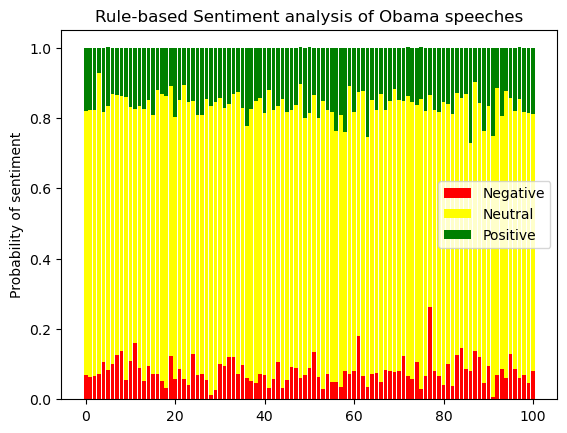

In [25]:
x=data.index
plt.bar(x,oba_neg,color='red',label='Negative')
plt.bar(x,oba_neu,bottom=oba_neg,color='yellow',label='Neutral')
plt.bar(x,oba_pos,bottom=[sum(x) for x in zip(oba_neu,oba_neg)],color='green',label='Positive')
plt.ylabel('Probability of sentiment')
plt.title('Rule-based Sentiment analysis of Obama speeches')
plt.legend(loc='best')
plt.show()

In [7]:
#Create dataframe for plotting obama data using plotly
oba_bardata=pd.DataFrame({'oba_neg':oba_neg,'oba_neu':oba_neu,'oba_pos':oba_pos},index=data['date'])
oba_bardata.head()

,oba_neg,oba_neu,oba_pos
date,,,
2004-07-28,0.070,0.749,0.181
2008-06-04,0.063,0.760,0.177
2008-11-05,0.066,0.758,0.176
2009-01-05,0.072,0.856,0.072
2009-01-20,0.105,0.711,0.184


In [12]:
#Tail to remove the first obs which is from 2004 and messes with the plot
#You can change between px.line, px.bar (difficult to see) and px.histogram (messy aggregation)

fig=px.line(oba_bardata.tail(-1),x=oba_bardata.tail(-1).index,y=['oba_neg','oba_neu','oba_pos'])
fig.show()

## Part 2: Fine-grained sentiment analysis using FastText and/or Flair

In [ ]:
#Reload original dataframe
data = pd.read_csv('nonEmotiondata.csv')